In [1]:
import sys; sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
book_df = pd.read_csv('../data/Books.csv', usecols=["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Image-URL-M"])
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [3]:
book_df.rename(columns={
    "ISBN": "book_id", 
    "Book-Title": "book_title", 
    "Book-Author": "book_author",
    "Year-Of-Publication": "year_of_publication",
    "Publisher": "publisher",
    "Image-URL-M": "image"
}, inplace=True)

In [4]:
print(f"レコード数: {len(book_df)}")

レコード数: 271360


In [5]:
# 同じ名前の本があるという紛らわしいこと
book_df.groupby("book_title").size().sort_values(ascending=False)

book_title
Selected Poems                             27
Little Women                               24
Wuthering Heights                          21
Dracula                                    20
Adventures of Huckleberry Finn             20
                                           ..
Hinds Feet On High Places                   1
Hinds Feet on High Places                   1
Hinds Feet on High Places Women             1
Hindsight: A Novel of the Class of 1972     1
Ã?Â?thique en toc                           1
Length: 242135, dtype: int64

In [6]:
book_df.groupby("year_of_publication").size()

year_of_publication
0                    3570
1806                    1
1900                    1
1901                    7
1902                    2
                     ... 
2024                    1
2030                    3
2037                    1
DK Publishing Inc       2
Gallimard               1
Length: 202, dtype: int64

(1960.0, 2006.0)

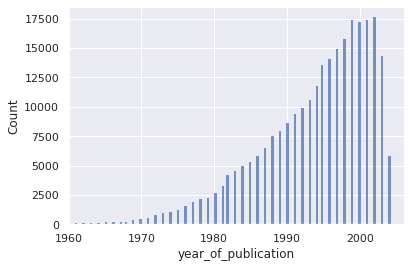

In [7]:
# 西暦ではない後ろの２つは、履歴と一緒にあとで消す、とする。0もどうにかする。
temp_df = book_df[(book_df["year_of_publication"]!="DK Publishing Inc") & (book_df["year_of_publication"]!="Gallimard")]
temp_df = temp_df.astype({"year_of_publication": int})
temp_df = temp_df[temp_df["year_of_publication"]!=0]

pub_dict = temp_df.groupby("year_of_publication").size().to_dict()

sns.histplot(temp_df["year_of_publication"])
plt.xlim(1960,2006)

In [8]:
# nullなauthorレコードは一件しかないのでdropする
nan_author_index = book_df[book_df["book_author"].isnull()].index
book_df.drop(nan_author_index, inplace=True)

In [9]:
author_size = len(book_df.groupby('book_author').size())
print(f"著者の数: {author_size}")

著者の数: 102023


In [10]:
book_df.groupby('book_author').size().describe()

count    102023.000000
mean          2.659783
std           7.908872
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         632.000000
dtype: float64

In [11]:
# 最も本を出した著者トップ１０人
book_df.groupby('book_author').size().sort_values(ascending=False)[:10]

book_author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
dtype: int64

Text(0.5, 1.0, '著者の出版数\u3000箱ひげ図')

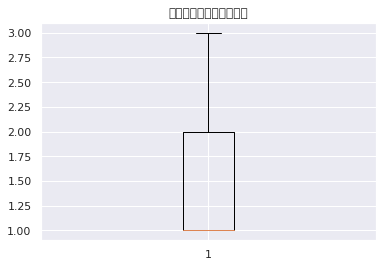

In [12]:
publish_count_list = book_df.groupby('book_author').size().to_list()

fig, ax = plt.subplots()

ax.boxplot(publish_count_list, sym="")
ax.set_title('著者の出版数　箱ひげ図')

Text(0, 0.5, '著者の数')

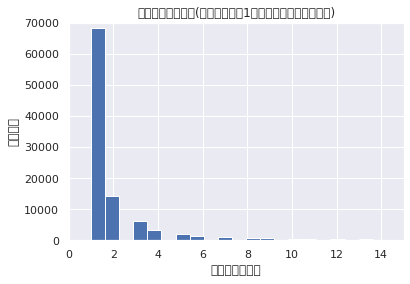

In [13]:
fig, ax = plt.subplots()
ax.hist(x=publish_count_list, bins=1000)
ax.set_xlim(0,15)
ax.set_ylim(0,70000)
ax.set_title('著者ごとの出版数(７割の著者は1回しか本を出していない)')
ax.set_xlabel('本を出した回数')
ax.set_ylabel('著者の数')


In [14]:
nan_publisher_count = len(book_df[book_df["publisher"].isnull()])
print(f'出版社が不明の数: {nan_publisher_count}')

出版社が不明の数: 2


In [15]:
# nanのレコードは落としておく
nan_publisher_index_list = book_df[book_df["publisher"].isnull()].index
book_df.drop(nan_publisher_index_list, inplace=True)

In [16]:
publisher_count = len(book_df.groupby("publisher").size())
print(f"出版社数:　{publisher_count}")

出版社数:　16806


In [17]:
# 最も本を出した出版社トップ１０
book_df.groupby("publisher").size().sort_values(ascending=False)[:10]

publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
dtype: int64

In [18]:
# 著者と同じくほとんどの出版社は4回しか本を出していない。大企業はごくわずか
book_df.groupby("publisher").size().describe()

count    16806.000000
mean        16.146436
std        127.884518
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       7535.000000
dtype: float64

Text(0, 0.5, '出版社の数')

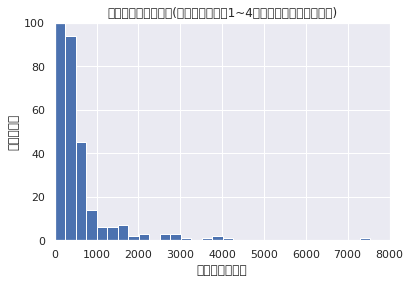

In [19]:
#大企業を分析
publisher_count_list = book_df.groupby('publisher').size().to_list()

fig, ax = plt.subplots()
ax.hist(x=publisher_count_list, bins=30)
ax.set_xlim(0,8000)
ax.set_ylim(0,100)
ax.set_title('出版社ごとの出版数(７割の出版社は1~4回しか本を出していない)')
ax.set_xlabel('本を出した回数')
ax.set_ylabel('出版社の数')

In [20]:
import joblib
joblib.dump(book_df, "../data/book.pkl")

['../data/book.pkl']